<a href="https://colab.research.google.com/github/Sabri-blm/British-Airways-analysis/blob/main/British_airways_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from textblob import TextBlob
from wordcloud import WordCloud

import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

from tqdm.notebook import tqdm

In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 37
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2300 total reviews
Scrapi

In [ ]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Flight was delayed due to t...
1,Not Verified | Fast and friendly check in (to...
2,✅ Trip Verified | I don't understand why Brit...
3,Not Verified | I'm sure that BA have graduall...
4,✅ Trip Verified | Customer Service does not e...


In [ ]:
pd.set_option('display.max_colwidth', None)
df.iloc[0]

reviews    ✅ Trip Verified |  Flight was delayed due to the inbound flight arriving late. There was no announcement to inform of the delay nor were the sceens updated. When ready to board we were requested to take our seats quickly to help reduce the delay, which people did. The pilot then announced he had received the documents for the wrong flight from ground staff, so we had to wait while they returned to get the right paperwork. After this was resolved, the pilot announced there would be a delay as there was only two push back tractors and we had to wait again. So after rushing to sit quickly, we sat the the aircraft at the gate for nearly one hour, which is longer than the flight takes ! Of course AMS is not BAs home base and it uses contracted staff here, but it should require a better level of service, It was embarrassing hearing the pilot apologise at every step of the way. It’ll be Eurostar for me next time.
Name: 0, dtype: object

In [ ]:
df.to_csv("data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [ ]:
clean_df = df.copy()

In [ ]:
clean_df.head()

,reviews
0,"✅ Trip Verified | Flight was delayed due to the inbound flight arriving late. There was no announcement to inform of the delay nor were the sceens updated. When ready to board we were requested to take our seats quickly to help reduce the delay, which people did. The pilot then announced he had received the documents for the wrong flight from ground staff, so we had to wait while they returned to get the right paperwork. After this was resolved, the pilot announced there would be a delay as there was only two push back tractors and we had to wait again. So after rushing to sit quickly, we sat the the aircraft at the gate for nearly one hour, which is longer than the flight takes ! Of course AMS is not BAs home base and it uses contracted staff here, but it should require a better level of service, It was embarrassing hearing the pilot apologise at every step of the way. It’ll be Eurostar for me next time."
1,"Not Verified | Fast and friendly check in (total contrast to Gatwick). The contract lounge is comfortable and spacious with a bar and pleasant staff but you have to pay for alcohol after the one free glass of wine. Food best avoided. On board, great crew and dinner was actually good quality and substantial apart from the ""chocolate and orange pot"" that seems to appear on every flight - have they bought up the global stock? The crew were always ready to top up drinks although white wine and beers were lukewarm. The crew explained that the carts are supposed to be chilled - from experience they rarely are. Is dry ice so expensive that BA can't afford it?"
2,"✅ Trip Verified | I don't understand why British Airways is classified as a 4 star airline? The service is really mediocre. The food is untasty and insufficient for a long haul trip. Some members of the cabin crew are friendly but they are not attentive enough and create a very basic experience. This really is all about getting from point A to B without what it used to be an enjoyable trip making experience. The inflight entertainment is fairly good, but you do need to bring your own water not to get dehydrated, some snacks and ideally food and perhaps smile to yourself as otherwise you are faced with just a cold, personality less experience."
3,"Not Verified | I'm sure that BA have gradually made their economy experience (BA Euroflyer out of Gatwick) so miserable that passengers are tempted to upgrade to the lacklustre and overpriced business class. Long wait at the biz checkin ( due to status ) and dealt with by a bored agent - OK third party, but still representing BA - who hardly spoke and avoided eye contact and was more focussed on her fingernails. Lounge was crowded and grubby but at least the staff there are pleasant and helpful On board the seats are cramped and uncomfortable and it took over two hours before crew appeared with food sales and the ""free water"" which on Gatwick services consists of a half full plastic cup rather than the luxury of a small bottle.. A fellow passenger mentioned the delay and the fact that they had no sandwiches for sale which prompted the flight attendant to say that the service was much better on Easyjet who do two service runs etc."
4,"✅ Trip Verified | Customer Service does not exist. One world emerald, frequent long haul flyer (including BA) - never seen such poor customer service or “computer says no”. Official BA.com site said all morning and afternoon that flight from Gatwick, delayed 2 hours. Delayed leaving for airport -only for BA to change back to original time. Called BA customer service 1.5 hours prior from highway saying situation - told not to worry, would note and flight rebooked if issue but go to airport. Got to airport 40 mins prior told could not board and that staff did not work for BA so could not help. Back on phone, 3 hours in total to be told could be rebooked, then couldn’t be, round and round. Ultimately told to file complaint. Then found out flight left 2 hours delayed. Paid for extra hot

In [ ]:
clean_df.iloc[0,0].split("|")[0].split(" ")[1] == 'Trip'

True

In [ ]:
clean_df["verified"] = clean_df["reviews"].apply(lambda x : 1 if (x.split("|")[0].split(" ")[1] == 'Trip') else 0)

In [ ]:
clean_df["reviews"] = clean_df["reviews"].apply(lambda x : x.split(" | ")[1] if (len(x.split(" | ")) > 1) else x)

In [ ]:
clean_df.head()

,reviews,verified
0,"Flight was delayed due to the inbound flight arriving late. There was no announcement to inform of the delay nor were the sceens updated. When ready to board we were requested to take our seats quickly to help reduce the delay, which people did. The pilot then announced he had received the documents for the wrong flight from ground staff, so we had to wait while they returned to get the right paperwork. After this was resolved, the pilot announced there would be a delay as there was only two push back tractors and we had to wait again. So after rushing to sit quickly, we sat the the aircraft at the gate for nearly one hour, which is longer than the flight takes ! Of course AMS is not BAs home base and it uses contracted staff here, but it should require a better level of service, It was embarrassing hearing the pilot apologise at every step of the way. It’ll be Eurostar for me next time.",1
1,"Fast and friendly check in (total contrast to Gatwick). The contract lounge is comfortable and spacious with a bar and pleasant staff but you have to pay for alcohol after the one free glass of wine. Food best avoided. On board, great crew and dinner was actually good quality and substantial apart from the ""chocolate and orange pot"" that seems to appear on every flight - have they bought up the global stock? The crew were always ready to top up drinks although white wine and beers were lukewarm. The crew explained that the carts are supposed to be chilled - from experience they rarely are. Is dry ice so expensive that BA can't afford it?",0
2,"I don't understand why British Airways is classified as a 4 star airline? The service is really mediocre. The food is untasty and insufficient for a long haul trip. Some members of the cabin crew are friendly but they are not attentive enough and create a very basic experience. This really is all about getting from point A to B without what it used to be an enjoyable trip making experience. The inflight entertainment is fairly good, but you do need to bring your own water not to get dehydrated, some snacks and ideally food and perhaps smile to yourself as otherwise you are faced with just a cold, personality less experience.",1
3,"I'm sure that BA have gradually made their economy experience (BA Euroflyer out of Gatwick) so miserable that passengers are tempted to upgrade to the lacklustre and overpriced business class. Long wait at the biz checkin ( due to status ) and dealt with by a bored agent - OK third party, but still representing BA - who hardly spoke and avoided eye contact and was more focussed on her fingernails. Lounge was crowded and grubby but at least the staff there are pleasant and helpful On board the seats are cramped and uncomfortable and it took over two hours before crew appeared with food sales and the ""free water"" which on Gatwick services consists of a half full plastic cup rather than the luxury of a small bottle.. A fellow passenger mentioned the delay and the fact that they had no sandwiches for sale which prompted the flight attendant to say that the service was much better on Easyjet who do two service runs etc.",0
4,"Customer Service does not exist. One world emerald, frequent long haul flyer (including BA) - never seen such poor customer service or “computer says no”. Official BA.com site said all morning and afternoon that flight from Gatwick, delayed 2 hours. Delayed leaving for airport -only for BA to change back to original time. Called BA customer service 1.5 hours prior from highway saying situation - told not to worry, would note and flight rebooked if issue but go to airport. Got to airport 40 mins prior told could not board and that staff did not work for BA so could not help. Back on phone, 3 hours in total to be told could be rebooked, then couldn’t be, round and round. Ultimately told to file complaint. Then found out flight left 2 hours delayed. Paid for extra hotels flights with more competent airlines and now told 38 days wait 



---



---


### idea's:
to reduce potential deception through increased authentication

verifiyed : authentic review

unverifiyed : take into consideration that this might be a case where the person who left a review didn't take the flight

In [ ]:
def get_sub(text):
  return TextBlob(text).sentiment.subjectivity

def get_pol(text):
  return TextBlob(text).sentiment.polarity

clean_df["subjectivity"] = clean_df["reviews"].apply(get_sub)
clean_df["polarity"] = clean_df["reviews"].apply(get_pol)

clean_df

,reviews,verified,subjectivity,polarity
0,"Flight was delayed due to the inbound flight arriving late. There was no announcement to inform of the delay nor were the sceens updated. When ready to board we were requested to take our seats quickly to help reduce the delay, which people did. The pilot then announced he had received the documents for the wrong flight from ground staff, so we had to wait while they returned to get the right paperwork. After this was resolved, the pilot announced there would be a delay as there was only two push back tractors and we had to wait again. So after rushing to sit quickly, we sat the the aircraft at the gate for nearly one hour, which is longer than the flight takes ! Of course AMS is not BAs home base and it uses contracted staff here, but it should require a better level of service, It was embarrassing hearing the pilot apologise at every step of the way. It’ll be Eurostar for me next time.",1,0.523901,0.004029
1,"Fast and friendly check in (total contrast to Gatwick). The contract lounge is comfortable and spacious with a bar and pleasant staff but you have to pay for alcohol after the one free glass of wine. Food best avoided. On board, great crew and dinner was actually good quality and substantial apart from the ""chocolate and orange pot"" that seems to appear on every flight - have they bought up the global stock? The crew were always ready to top up drinks although white wine and beers were lukewarm. The crew explained that the carts are supposed to be chilled - from experience they rarely are. Is dry ice so expensive that BA can't afford it?",0,0.579167,0.315104
2,"I don't understand why British Airways is classified as a 4 star airline? The service is really mediocre. The food is untasty and insufficient for a long haul trip. Some members of the cabin crew are friendly but they are not attentive enough and create a very basic experience. This really is all about getting from point A to B without what it used to be an enjoyable trip making experience. The inflight entertainment is fairly good, but you do need to bring your own water not to get dehydrated, some snacks and ideally food and perhaps smile to yourself as otherwise you are faced with just a cold, personality less experience.",1,0.535278,0.137222
3,"I'm sure that BA have gradually made their economy experience (BA Euroflyer out of Gatwick) so miserable that passengers are tempted to upgrade to the lacklustre and overpriced business class. Long wait at the biz checkin ( due to status ) and dealt with by a bored agent - OK third party, but still representing BA - who hardly spoke and avoided eye contact and was more focussed on her fingernails. Lounge was crowded and grubby but at least the staff there are pleasant and helpful On board the seats are cramped and uncomfortable and it took over two hours before crew appeared with food sales and the ""free water"" which on Gatwick services consists of a half full plastic cup rather than the luxury of a small bottle.. A fellow passenger mentioned the delay and the fact that they had no sandwiches for sale which prompted the flight attendant to say that the service was much better on Easyjet who do two service runs etc.",0,0.577160,0.027778
4,"Customer Service does not exist. One world emerald, frequent long haul flyer (including BA) - never seen such poor customer service or “computer says no”. Official BA.com site said all morning and afternoon that flight from Gatwick, delayed 2 hours. Delayed leaving for airport -only for BA to change back to original time. Called BA customer service 1.5 hours prior from highway saying situation - told not to worry, would note and flight rebooked if issue but go to airport. Got to airport 40 mins prior told could not board and that staff did not work for BA so could not help. Back on phone, 3 hours in total to be told could be rebooked, then couldn’t be, round and round. Ultimately told to file complaint. Then found out flight left 2 hours 

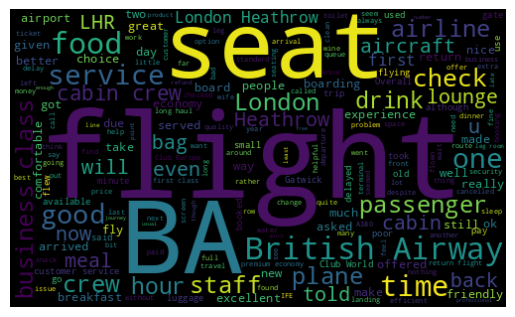

In [ ]:
all_words = ' '.join([rev for rev in clean_df["reviews"]])

wordcloud = WordCloud(width=500, height=300, random_state=0, max_font_size=119).generate(all_words)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
def get_analysis(score):
  if score < 0:
    return 'negative'
  elif score == 0:
    return 'neutral'
  else:
    return 'positive'

clean_df["analysis"] = clean_df["polarity"].apply(get_analysis)
clean_df

,reviews,verified,subjectivity,polarity,analysis
0,"Flight was delayed due to the inbound flight arriving late. There was no announcement to inform of the delay nor were the sceens updated. When ready to board we were requested to take our seats quickly to help reduce the delay, which people did. The pilot then announced he had received the documents for the wrong flight from ground staff, so we had to wait while they returned to get the right paperwork. After this was resolved, the pilot announced there would be a delay as there was only two push back tractors and we had to wait again. So after rushing to sit quickly, we sat the the aircraft at the gate for nearly one hour, which is longer than the flight takes ! Of course AMS is not BAs home base and it uses contracted staff here, but it should require a better level of service, It was embarrassing hearing the pilot apologise at every step of the way. It’ll be Eurostar for me next time.",1,0.523901,0.004029,positive
1,"Fast and friendly check in (total contrast to Gatwick). The contract lounge is comfortable and spacious with a bar and pleasant staff but you have to pay for alcohol after the one free glass of wine. Food best avoided. On board, great crew and dinner was actually good quality and substantial apart from the ""chocolate and orange pot"" that seems to appear on every flight - have they bought up the global stock? The crew were always ready to top up drinks although white wine and beers were lukewarm. The crew explained that the carts are supposed to be chilled - from experience they rarely are. Is dry ice so expensive that BA can't afford it?",0,0.579167,0.315104,positive
2,"I don't understand why British Airways is classified as a 4 star airline? The service is really mediocre. The food is untasty and insufficient for a long haul trip. Some members of the cabin crew are friendly but they are not attentive enough and create a very basic experience. This really is all about getting from point A to B without what it used to be an enjoyable trip making experience. The inflight entertainment is fairly good, but you do need to bring your own water not to get dehydrated, some snacks and ideally food and perhaps smile to yourself as otherwise you are faced with just a cold, personality less experience.",1,0.535278,0.137222,positive
3,"I'm sure that BA have gradually made their economy experience (BA Euroflyer out of Gatwick) so miserable that passengers are tempted to upgrade to the lacklustre and overpriced business class. Long wait at the biz checkin ( due to status ) and dealt with by a bored agent - OK third party, but still representing BA - who hardly spoke and avoided eye contact and was more focussed on her fingernails. Lounge was crowded and grubby but at least the staff there are pleasant and helpful On board the seats are cramped and uncomfortable and it took over two hours before crew appeared with food sales and the ""free water"" which on Gatwick services consists of a half full plastic cup rather than the luxury of a small bottle.. A fellow passenger mentioned the delay and the fact that they had no sandwiches for sale which prompted the flight attendant to say that the service was much better on Easyjet who do two service runs etc.",0,0.577160,0.027778,positive
4,"Customer Service does not exist. One world emerald, frequent long haul flyer (including BA) - never seen such poor customer service or “computer says no”. Official BA.com site said all morning and afternoon that flight from Gatwick, delayed 2 hours. Delayed leaving for airport -only for BA to change back to original time. Called BA customer service 1.5 hours prior from highway saying situation - told not to worry, would note and flight rebooked if issue but go to airport. Got to airport 40 mins prior told could not board and that staff did not work for BA so could not help. Back on phone, 3 hours in total to be told could be rebooked, then couldn’t be, round and round. Ultimately told to file c

  0%|          | 0/3606 [00:00<?, ?it/s]

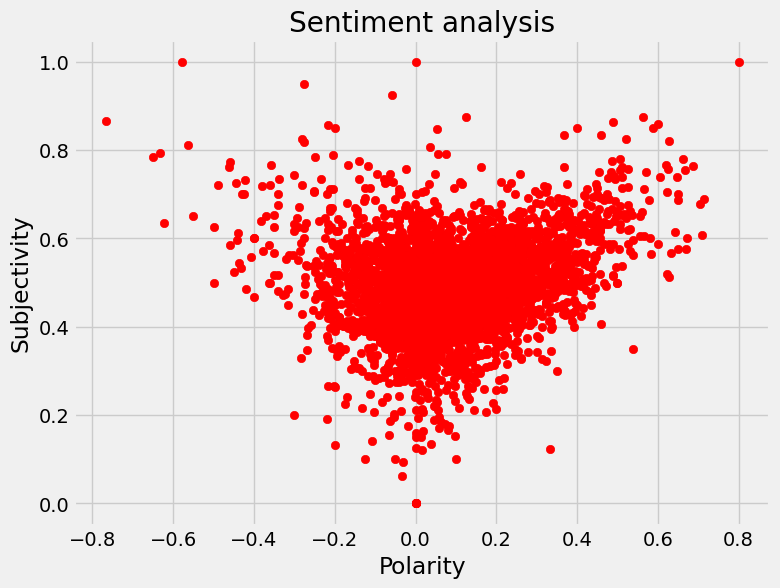

In [ ]:
plt.figure(figsize=(8,6))
for i in tqdm(range(0, clean_df.shape[0])):
  plt.scatter(clean_df["polarity"][i], clean_df["subjectivity"][i], color='red')

plt.title('Sentiment analysis')
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.show()

In [ ]:
positive = clean_df[clean_df["analysis"] == "positive"]
neutral = clean_df[clean_df["analysis"] == "neutral"]
negative = clean_df[clean_df["analysis"] == "negative"]

print("percentage of positive ", positive.shape[0]/clean_df.shape[0])

print("percentage of neutral ", neutral.shape[0]/clean_df.shape[0])

print("percentage of negative ", negative.shape[0]/clean_df.shape[0])

percentage of positive  0.7052135330005547
percentage of neutral  0.004437049362174155
percentage of negative  0.29034941763727123


# Only verified reviews

In [51]:
verified = clean_df[clean_df.verified == 1]

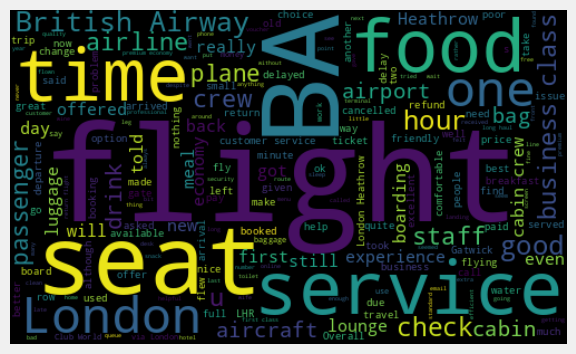

In [52]:
all_words = ' '.join([rev for rev in verified["reviews"]])

wordcloud = WordCloud(width=500, height=300, random_state=0, max_font_size=119).generate(all_words)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [56]:
verified["polarity"][0]

1082

  0%|          | 0/1082 [00:00<?, ?it/s]

KeyError: ignored

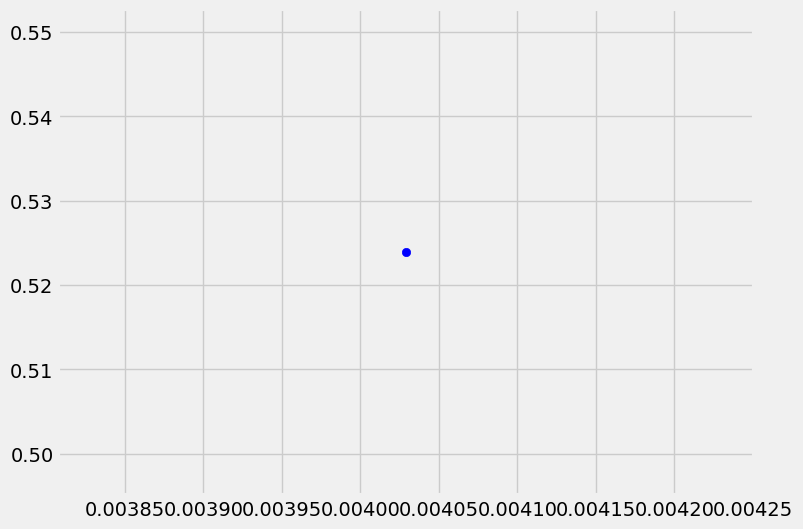

In [55]:
plt.figure(figsize=(8,6))
for i in tqdm(range(0, verified.shape[0])):
  plt.scatter(verified["polarity"][i], verified["subjectivity"][i], color='blue')

plt.title('Sentiment analysis')
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.show()